In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pprint import pp

# Problem 9
$$\sin(x)=\sum_{n=0}^{\infty}(-1)^n\frac{x^{2n+1}}{(2n+1)!}$$

Let $f_n = (-1)^n \frac{x^{2n+1}}{(2n+1)!}$. Then we have the following relation:

$$f_{n+1} = - f_n \frac{x^2}{(2n+2)(2n+3)}$$

This way we can efficiently calculate the Taylor series. We can use a similar result for the cosine.

Also, we only have to consider the interval $[-\pi/4, \pi/4]$, because we can use periodicity and (a)symmetry of the sine and cosine.

In [3]:
def sine_taylor_generator(x):
    term = x  # first term is x (when n=0)
    n = 0
    while True:
        yield term
        # Compute next term using the recurrence relation:
        term = -term * x * x / ((2 * n + 2) * (2 * n + 3))
        n += 1

def cosine_taylor_generator(x):
    term = 1.0  # The first term: cos(x) starts with 1 (when n = 0)
    n = 0
    while True:
        yield term
        # Recurrence relation: t(n+1) = -t(n) * x^2 / ((2n+1)*(2n+2))
        term = -term * x * x / ((2 * n + 1) * (2 * n + 2))
        n += 1

## Reducing Angle

This method computes $\sin(x)$ for any angle $x$ by reducing it to a base interval $[-\pi/4, \pi/4]$, where the sine and cosine functions can be well approximated.

1. Reduce Modulo $2\pi$

- Reduce $x$ modulo $2\pi$ so that the equivalent angle $x_{\text{mod}}$ lies within $(-\pi, \pi]$.

2. Express in Terms of a Base Interval

- Express the reduced angle as:

  $$
  x_{\text{mod}} = k \frac{\pi}{2} + r,
  $$

  where $r$ is chosen to be in $[-\pi/4, \pi/4]$.

- Compute $k$ as:

  $$
  k = \text{round}\left(\frac{2x_{\text{mod}}}{\pi} \right).
  $$

- Compute $r$ as:

  $$
  r = x_{\text{mod}} - k \frac{\pi}{2}.
  $$

  Since

  $$
  \frac{2x_{\text{mod}}}{\pi} - \frac{2r}{\pi} = k
  $$

  and 

  $$
  \frac{2r}{\pi} \in \left[-\frac{1}{2}, \frac{1}{2} \right],
  $$

  rounding gives the correct expression.

3. Compute $\sin(x)$ Based on $k \mod 4$

- If $k \equiv 0 \pmod{4}$:

  $$
  \sin(x) = \sin(r)
  $$

- If $k \equiv 1 \pmod{4}$:

  $$
  \sin(x) = \cos(r)
  $$

- If $k \equiv 2 \pmod{4}$:

  $$
  \sin(x) = -\sin(r)
  $$

- If $k \equiv 3 \pmod{4}$:

  $$
  \sin(x) = -\cos(r)
  $$



In [4]:
def base_sin(r, order):
    gen = sine_taylor_generator(r)
    approx = 0.
    for _ in range(order):
        approx += next(gen)
    return approx

def base_cos(r, order):
    gen = cosine_taylor_generator(r)
    approx = 0.
    for _ in range(order):
        approx += next(gen)
    return approx


def custom_sin(x, order=2):
    # Step 1: Reduce the angle to (-pi, pi]
    x_mod = x % (2 * math.pi)
    if x_mod > math.pi:
        x_mod -= 2 * math.pi
    # Step 2: Find k such that r = x_mod - k*(pi/2) lies in [-pi/4, pi/4]
    k = round(2 * x_mod / math.pi)
    r = x_mod - k * (math.pi / 2)
    
    # Step 3: Use the identity based on k modulo 4
    mod = k % 4
    if mod == 0:
        return base_sin(r, order)
    elif mod == 1:
        return base_cos(r, order)
    elif mod == 2:
        return -base_sin(r, order)
    elif mod == 3:
        return -base_cos(r, order)

Lagrange form of the remainder

There exists $c$ in $[a,x]$ such that
$$f(x) - \left ( \sum_{j=0}^{n}\dfrac{f^{(j)}(a)}{j!}(x-a)^j \right ) = \dfrac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{n+1}$$

So to get an approximation of the error we just calculate one more Taylor series term evaluated in $x$.

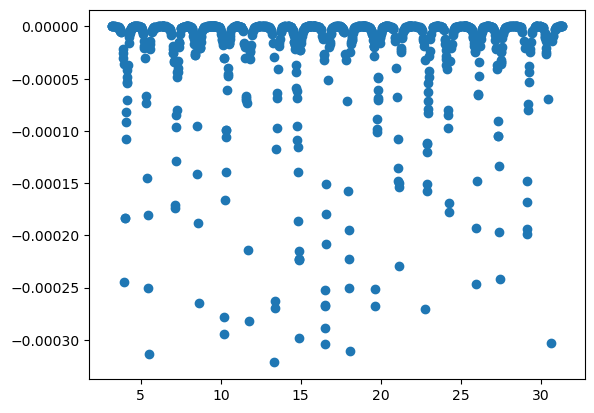

In [135]:
test_values = np.random.uniform(math.pi, 10*math.pi, 1000)

# Plot the custom_sin function
# Create a list of orders to test
orders = list(range(1, 13))  # from 2 to 10


# Calculate true sine values using numpy's sin function
true_sin_values = np.sin(test_values)
custom_sin_values_of_order = lambda order: np.array([custom_sin(x, order) for x in test_values])

# Calculate errors for each order
lagrangian_error_of_order = lambda order: np.abs(custom_sin_values_of_order(order+1) - custom_sin_values_of_order(order))
real_error_of_order = lambda order: np.abs(true_sin_values - custom_sin_values_of_order(order))

plt.scatter(test_values, real_error_of_order(2) - lagrangian_error_of_order(2))

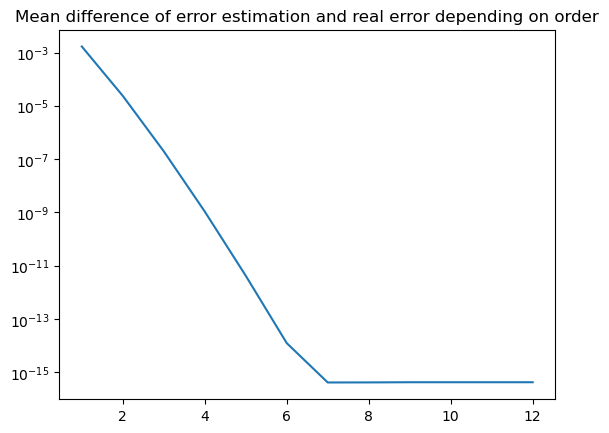

In [142]:
mean_difference_of_error_estimations = [np.mean(np.abs(real_error_of_order(order) - lagrangian_error_of_order(order))) for order in orders]
plt.title("Mean difference of error estimation and real error depending on order")
plt.semilogy(orders, mean_difference_of_error_estimations)

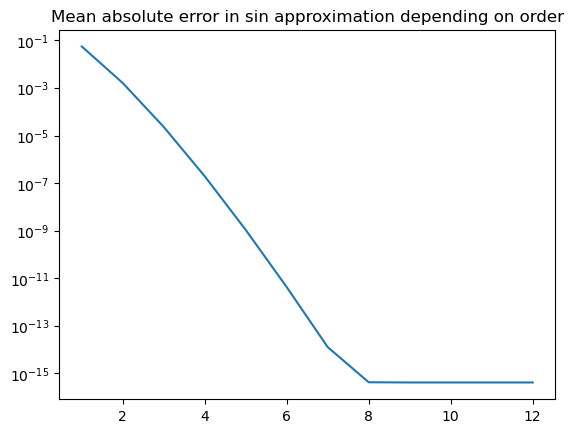

In [115]:
# Plot the errors
mean_errors = [np.mean(real_error_of_order(order)) for order in orders]
# errors = [np.mean(np.abs(true_sin_values - custom_sin_values_of_order(order))) for order in orders]
plt.title("Mean absolute error in sin approximation depending on order")
plt.semilogy(orders, mean_errors)

# Problem 10

### **LU Factorization of a Tridiagonal Matrix**
Given a tridiagonal matrix $ A $:

$$
A = \begin{bmatrix}
a_1 & b_1 & 0 & 0 & \dots & 0 \\
c_1 & a_2 & b_2 & 0 & \dots & 0 \\
0 & c_2 & a_3 & b_3 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & 0 & c_{n-2} & a_{n-1} & b_{n-1} \\
0 & 0 & 0 & 0 & c_{n-1} & a_n
\end{bmatrix}
$$

we want to find $ L $ and $ U $ such that:

$$
A = LU
$$

We can see that

$$
L = \begin{bmatrix}
1 & 0 & 0 & \dots & 0 \\
\ell_1 & 1 & 0 & \dots & 0 \\
0 & \ell_2 & 1 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ell_{n-2} & 1 \\
0 & 0 & 0 & 0 & \ell_{n-1} & 1
\end{bmatrix}
$$

$$
U = \begin{bmatrix}
u_1 & b_1 & 0 & \dots & 0 \\
0 & u_2 & b_2 & \dots & 0 \\
0 & 0 & u_3 & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & u_{n-1} & b_{n-1} \\
0 & 0 & 0 & 0 & 0 & u_n
\end{bmatrix}
$$

with:
   $$
   u_1 = a_1
   $$
   $$
   \ell_i = \frac{c_i}{u_i}
   $$
   $$
   u_{i+1} = a_{i+1} - \ell_i b_i
   $$

In [ ]:
def tridiagonal_lu_decomp(a, b, c): 
    """Compute the LU decomposition of a tridiagonal matrix.
    Args:
        a (ndarray): Diagonal elements of the matrix (length n)
        b (ndarray): Superdiagonal elements of the matrix (length n-1)
        c (ndarray): Subdiagonal elements of the matrix (length n-1)
        
    Returns:
        tuple: A tuple (l, u) where:
            - l is the subdiagonal of the lower triangular matrix L (length n-1)
            - u is the diagonal of the upper triangular matrix U (length n)
    """
            
    n = len(a)
    l = np.zeros(n-1)
    u = np.zeros(n)
    u[0] = a[0]
    for i in range(1, n):
        l[i-1] = c[i-1] / u[i-1]
        u[i] = a[i] - l[i-1] * b[i-1]
    return (l, u)

Now that we have the decomposition we can solve $LUx = f$ like this:
1. $Ly=f$
$$ y_1 = f_1,\ y_i = f_i - \ell_i y_{i-1} $$
2. $Ux=y$
$$ x_n = \frac{y_n}{u_n},\ x_i= \frac{y_i - b_i x_{i+1}}{u_i}$$

In [ ]:
def tridiagonal_lu_solve(l, u, b, f):
    """Solves LUx = f for a tridiagonal LU decomposition.
    
    Args:
        l (ndarray): Subdiagonal elements of L (length n-1)
        u (ndarray): Diagonal elements of U (length n)
        b (ndarray): Superdiagonal elements of U (length n-1)
        f (ndarray): Right-hand side vector (length n)
        
    Returns:
        x (ndarray): Solution vector (length n)
    """
    n = len(u)
    
    # Forward substitution: Solve L y = f
    y = np.zeros(n)
    y[0] = f[0]  # Since L[0,0] = 1 (implicit)
    
    for i in range(1, n):
        y[i] = f[i] - l[i-1] * y[i-1]  # Since L[i,i] = 1
    
    # Backward substitution: Solve U x = y
    x = np.zeros(n)
    x[-1] = y[-1] / u[-1]
    
    for i in range(n-2, -1, -1):
        x[i] = (y[i] - b[i] * x[i+1]) / u[i]
    
    return x

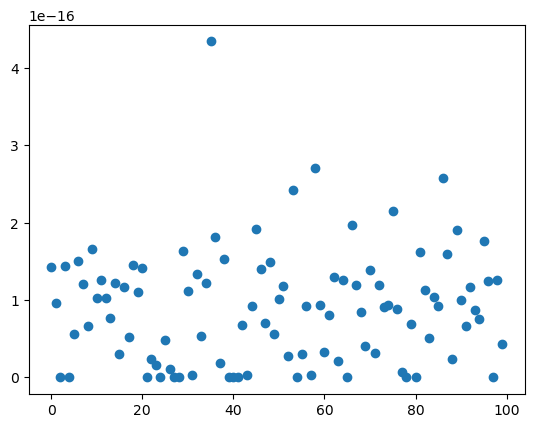

In [210]:
np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

def generate_tridiagonal(a,b,c):
    A = np.diag(a,k=0)
    A += np.diag(b,k=1)
    A += np.diag(c,k=-1)
    return A

n = 3
b = np.random.random(n)
c = np.random.random(n)
a = b + c + np.random.random(n)
b = b[:-1]
c = c[:-1]

l, u = tridiagonal_lu_decomp(a, b, c)


L = generate_tridiagonal(np.ones(n), np.zeros(n-1), l)
U = generate_tridiagonal(u, b, np.zeros(n-1))

A = generate_tridiagonal(a,b,c)

x_exact = np.random.random(size = (100,n))
f_exact = (A @ x_exact.T).T

x_algo = np.array([tridiagonal_lu_solve(l, u, b, f) for f in f_exact])

errors = np.linalg.norm(x_exact - x_algo, axis=1)/np.linalg.norm(x_exact, axis=1)

plt.scatter(range(100), errors)

We see that our algorithm is exact, because the errors are in the magnitude of machine precision